# Natural Language Processing

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [5]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
print(df["Review"][0]) #taking by index of this column for each row elements

Wow... Loved this place.


## Cleaning the texts

In [7]:
import re      #this library will help us to clean up the text in general
import nltk    
nltk.download('stopwords') #for non relevant words 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  # For stemming our reviews and taking only root words enough to the words mean, present tense only
corpus = []
for i in range(0, 1000):
    #First we're only going to keep letters a-zA-Z
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i]) 
    review = review.lower() #now in lower letter
    review = review.split() #here we split the review
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')  #load empty words(e.g., "the" ,"and", "not", etc) for remove it 
    all_stopwords.remove('not') #we keep the "not" because is important in our analysis
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review) #join the list of resulting tokens in one each string, separate by spaces
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#let's see our corpus string
print(type(corpus), len(corpus)) #returns a list of the same size of row as in our DF 
print(corpus)

<class 'list'> 1000
['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found p

## Creating the Bag of Words model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features = 1500) #for tokenization vocabulary order by frequency with a limit of features (dimension vector)
X = cv.fit_transform(corpus).toarray() #Here based on CV creates a vector for each corpus element with the number of matching elements with CV (same dimension vector as above)
y = df.iloc[:, -1].values #just taking the Liked column elements

In [10]:
len(X[0]) #as we established max_features

1500

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

Confussion Matrix Values: 
[[55 42]
 [12 91]]

Accuracy: 0.73

              precision    recall  f1-score   support

          No       0.82      0.57      0.67        97
         Yes       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



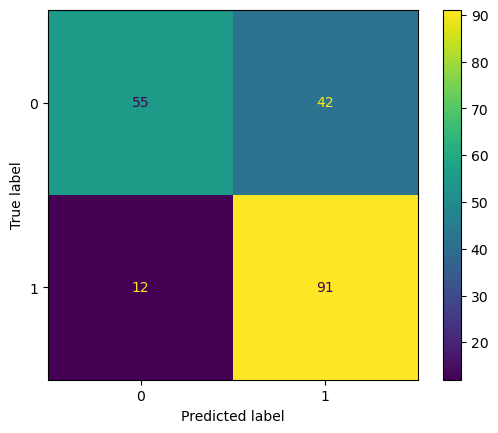

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
classes = ('No','Yes')
print(f"Confussion Matrix Values: \n{cm}\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=classes))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

## predicting new reviews

In [16]:
new_review = 'I really like this Restaurant and dishes'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


In [17]:
#predicting new review
new_review = "I hate this restaurant it's not as good as I thought"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


## Implementing with Multinomial NB


In [18]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=2.5)
clf.fit(X_train, y_train)  #same sintaxis


,alpha,2.5
,force_alpha,True
,fit_prior,True
,class_prior,None


### Instead of using the above alpha, let's search for the best one

In [19]:
alphas=np.random.uniform(0.01, 10, 1000)  # or you can implement gamma_trunc, trunc_norm, and any other ditribution
results=[]
for alpha_val in alphas:
    clf = MultinomialNB(alpha=alpha_val)
    clf.fit(X_train, y_train)  
    y_pred_mn = clf.predict(X_test)
    acc=accuracy_score(y_test, y_pred_mn)
    results.append((alpha_val, acc))
#Maximun accuracy
alpha_best , best_acc = max(results, key=lambda x: x[1])
print(f"Best alpha: {alpha_best}, Accuracy: {best_acc:.3f}")
#Best alphas 
#alp_h = [alpha for alpha, acc in results if acc>0.79]
#print(f"Alphas with accuracy > 0.79: {alp_h}\n")

Best alpha: 0.18167001431326849, Accuracy: 0.790


### Now we'll use this value

In [20]:
clf = MultinomialNB(alpha=alpha_best)
clf.fit(X_train, y_train)  #same sintaxis
y_pred_mn = clf.predict(X_test)
print(np.concatenate((y_pred_mn.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

Confussion Matrix Values: 
[[74 23]
 [19 84]]

Accurary Using Multonomial NB: 0.79

              precision    recall  f1-score   support

          No       0.80      0.76      0.78        97
         Yes       0.79      0.82      0.80       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



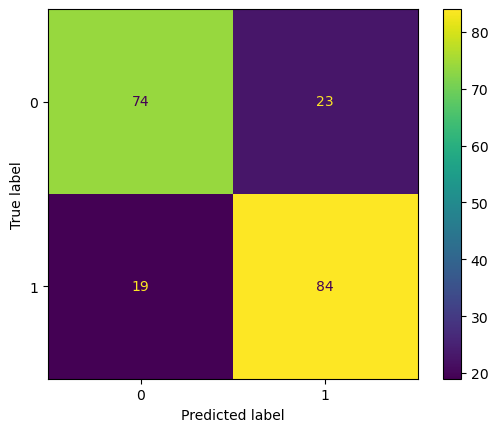

In [21]:
cmn = confusion_matrix(y_test, y_pred_mn)
print(f"Confussion Matrix Values: \n{cmn}\n")
print(f"Accurary Using Multonomial NB: {accuracy_score(y_test, y_pred_mn)}\n")
print(classification_report(y_test, y_pred_mn, target_names=classes))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_mn)
plt.show()

### predicting new reviews again

In [22]:
new_review = "I really like this Restaurant and dishes, they're delicious"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = clf.predict(new_X_test)
print(new_y_pred)

[1]


In [23]:
#predicting new review
new_review = "I hate this restaurant it's not as good as I thought"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = clf.predict(new_X_test)
print(new_y_pred)

[0]


## Analyzing the results 
 + ### We can say that the Multinomial NB has improved our overall model against Gaussian NB  reducing the True Positives but increasing the True Negative
 + ### Giving us an accuracy from 0.73 to 0.79 and an increasing in all metrics: precision, recall, etc. This with the best posible alpha.
 + ### Given this information, we can conclude the actual and potential clients who probably will come back to the restaurant, mall or who won't based on the reviews and work for a better services taking note to the most frequent words in the reviews vocabulary.